<a href="https://colab.research.google.com/github/Vaibhavkamuju/Temperature-Control-Using-PIB-Controller/blob/main/TP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [ ]:
def thermal_system(T, t, T_ambient, u, tau=10):
    dTdt = (1/tau) * (T_ambient + u - T)
    return dTdt


In [ ]:
class PIDController:
    def __init__(self, Kp, Ki, Kd, setpoint):
        self.Kp = Kp  # Proportional Gain
        self.Ki = Ki  # Integral Gain
        self.Kd = Kd  # Derivative Gain
        self.setpoint = setpoint
        self.prev_error = 0
        self.integral = 0

    def compute(self, T, dt):
        error = self.setpoint - T
        self.integral += error * dt
        derivative = (error - self.prev_error) / dt
        self.prev_error = error

        u = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        return u


In [ ]:
# Simulation Parameters
T_ambient = 20  # Ambient temperature (°C)
T_initial = 20  # Initial temperature (°C)
T_setpoint = 75  # Desired temperature (°C)
Kp, Ki, Kd = 2.0, 0.1, 1.0  # PID gains
dt = 0.1  # Time step
time = np.arange(0, 100, dt)  # Time vector

# Initialize PID controller
pid = PIDController(Kp, Ki, Kd, T_setpoint)

# Run simulation
T = T_initial
temperatures = []
control_inputs = []

for t in time:
    u = pid.compute(T, dt)  # Get control input from PID
    T = odeint(thermal_system, T, [t, t+dt], args=(T_ambient, u))[-1]
    T = T[0] # Solve ODE
    temperatures.append(T)
    control_inputs.append(u)

# Convert results to arrays
temperatures = np.array(temperatures)
control_inputs = np.array(control_inputs)


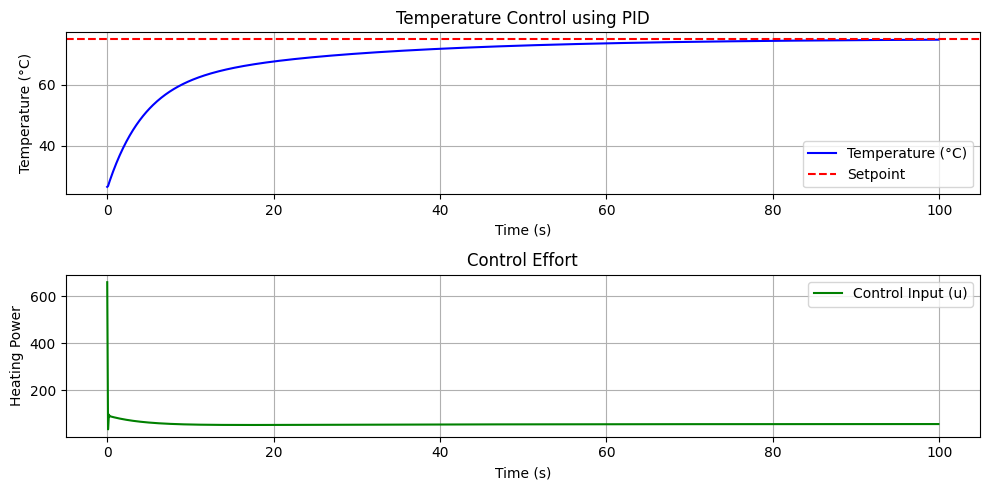

In [ ]:
plt.figure(figsize=(10, 5))

# Temperature Response
plt.subplot(2, 1, 1)
plt.plot(time, temperatures, label="Temperature (°C)", color='b')
plt.axhline(y=T_setpoint, color='r', linestyle='--', label="Setpoint")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Control using PID")
plt.legend()
plt.grid()

# Control Input
plt.subplot(2, 1, 2)
plt.plot(time, control_inputs, label="Control Input (u)", color='g')
plt.xlabel("Time (s)")
plt.ylabel("Heating Power")
plt.title("Control Effort")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
